In [1]:
import math
import numpy as np 
from matplotlib import pyplot as plt

In [6]:
#How many points in each area
N = 3
#Total points (has to be 3xN)
N2 = 9

#Arena proportions
Lx = 140
Ly = 40

#Velocity and size of time step
v0 = 10
dt = 0.001

#Max run steps
t_tot = 600000

#The maximum amount of random rotation
rotation_range = np.pi / 15

In [7]:
#Initialize random positions in 3 different areas of the arena
x = np.zeros(N2)
y = np.zeros(N2)
x[:N] = np.random.randint(low = 32, high = 65, size=[N])
y[:N] = np.random.randint(low = 22, high = 38, size=[N])
x[N:2*N] = np.random.randint(low = 106, high = 138, size=[N])
y[N:2*N] = np.random.randint(low = 2, high = 38, size=[N])
x[2*N:] = np.random.randint(low = 2, high = 42, size=[N])
y[2*N:] = np.random.randint(low = 11, high = 26, size=[N])

#Randomizes angle of velocity
phi = np.random.rand(N2)*2*np.pi
vx = v0*np.cos(phi)
vy = v0*np.sin(phi)

x_path = np.zeros([N2,t_tot])
y_path = np.zeros([N2,t_tot])

In [8]:
for t in range(t_tot):

    #Saves the path of the points
    x_path[:,t] = x
    y_path[:,t] = y
    
    #Updates the positions
    nx = x + vx*dt
    ny = y + vy*dt

    #Look if any point has reached any of the exits
    ind_exit1 = np.where((nx>12) & (nx<17) & (ny>=28))
    if np.size(ind_exit1) > 0:
        nx[ind_exit1] = np.nan
        ny[ind_exit1] = np.nan
        vx[ind_exit1] = np.nan
        vy[ind_exit1] = np.nan
        print("Exit 1")
        
    ind_exit2 = np.where((nx>104) & (nx<109) & (ny>=40))
    if np.size(ind_exit2) > 0:
        nx[ind_exit2] = np.nan
        ny[ind_exit2] = np.nan
        vx[ind_exit2] = np.nan
        vy[ind_exit2] = np.nan
        print("Exit 2")   

    ind_exit3 = np.where((ny>5) & (ny<10) & (nx>=140))    
    if np.size(ind_exit3) > 0:
        nx[ind_exit3] = np.nan
        ny[ind_exit3] = np.nan
        vx[ind_exit3] = np.nan
        vy[ind_exit3] = np.nan
        print("Exit 3")             

    #Updates the velocities with random angle
    randangle = (np.random.rand(N2) - 0.5) * 2 * rotation_range
    nvx = np.cos(randangle) * vx - np.sin(randangle) * vy
    nvy = np.sin(randangle) * vx + np.cos(randangle) * vy

    for i in range(N2):

        #----------VÄGGAR--------#
        
        if nx[i] < 0:
            x[i] = -nx[i]
            vx[i] = -nvx[i]

        elif nx[i] > Lx:
            x[i] = Lx - (nx[i]-Lx)
            vx[i] = -nvx[i]
        else:
            x[i] = nx[i]
            vx[i] = nvx[i]

        if ny[i] < 0:
            y[i] = -ny[i]
            vy[i] = -nvy[i]

        elif ny[i] > Ly:
            y[i] = Ly - (ny[i]-Ly)
            vy[i] = -nvy[i]
        else:
            y[i] = ny[i]
            vy[i] = nvy[i]

        #------KLOSSAR----------#

        # BLOCK 5 - VÄNSTRE ÖVRE
        if nx[i] < 30 and ny[i] > 28:
            y[i] = 56-ny[i]
            x[i] = 60-nx[i]
            vy[i] = -nvy[i]
            vx[i] = -nvx[i]

        # BLOCK 4 - STORA KLOSSEN
        if nx[i] > 67 and nx[i] < 104 and ny[i] < 30:

            if ny[i] >= 29:
                y[i] = 60-ny[i]
                x[i] = nx[i]
                vy[i] = -nvy[i]
                vx[i] = nvx[i]
            else:
                y[i] = ny[i]

            if nx[i] < 82:
                x[i] = 134-nx[i]
                vy[i] = nvy[i]
                vx[i] = -nvx[i] 
            else:
                x[i] = 208-nx[i]
                vy[i] = nvy[i]
                vx[i] = -nvx[i] 

        # BLOCK 2 - STÅENDE REKTANGEL
        if nx[i] > 44 and nx[i] < 58 and ny[i] < 20:

            y[i] = 40-ny[i]

            if ny[i] >=19:
                y[i] = 40-ny[i]
                x[i] = nx[i]
                vy[i] = -nvy[i]
                vx[i] = nvx[i]

            elif nx[i] < 55:
                x[i] = 88-nx[i]
                vy[i] = nvy[i]
                vx[i] = -nvx[i]
            else:
                x[i] = 116-nx[i]
                vy[i] = nvy[i]
                vx[i] = -nvx[i]      

        # BLOCK 1 - NEDRE VÄNSTRA HÖRNET
        if nx[i] < 44 and ny[i] < 9:
            y[i] = 18-ny[i]
            x[i] = nx[i]
            vy[i] = -nvy[i]
            vx[i] = -nvx[i]

        # BLOCK 3 - LILLA KVADRATEN
        if nx[i] > 58 and nx[i] < 67 and ny[i] < 6:

            y[i] = 12-ny[i]
            x[i] = nx[i]

            vy[i] = -nvy[i]
            vx[i] = -nvx[i]


Exit 3
Exit 1
Exit 3
Exit 2
Exit 2


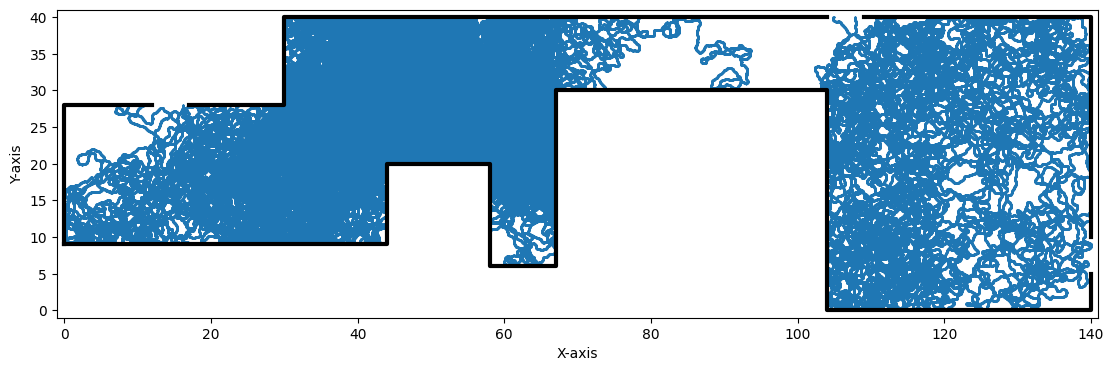

In [9]:
# Points to visualize the boundaries
x1 = [0,0,0,12]
x2 = [17,30,30,30,30,104]
x3 = [109,140,140,140]
x4 = [140,140,140,104,104,104,104,67,67,67,67,58,58,58,58,44,44,44,44,0]
y1 = [9,28,28,28]
y2 = [28,28,28,40,40,40]
y3 = [40,40,40,10]
y4 = [5,0,0,0,0,30,30,30,30,6,6,6,6,20,20,20,20,9,9,9]

#Plot trajectory and boundaries
plt.figure(figsize=(14, 4))
plt.scatter(x_path, y_path,s=0.1)
plt.plot(x1, y1, color='black',lw=3)
plt.plot(x2, y2, color='black',lw=3)
plt.plot(x3, y3, color='black',lw=3)
plt.plot(x4, y4, color='black',lw=3)
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.xlim(-1,Lx+1)
plt.ylim(-1,Ly+1)
plt.gca().set_aspect('equal', adjustable='box')


[ 2.33160516  9.98983786         nan         nan         nan  9.34398707
 -4.06147587 -6.6053459  -8.3488587 ]
